### Домашняя работа к уроку 8

#### Задача 1 
Обучите любую модель классификации на датасете IRIS до применения PCA и после него. Сравните качество классификации по отложенной выборке.

In [135]:
# Зависимости:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import random

In [136]:
# Готовим датасет:
iris = datasets.load_iris()

X = iris.data
y = iris.target
X.shape
y.shape

(150,)

In [137]:
# Готовим редуцированную с применением PCA с 2 главными компонентами:
pca = PCA(2)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

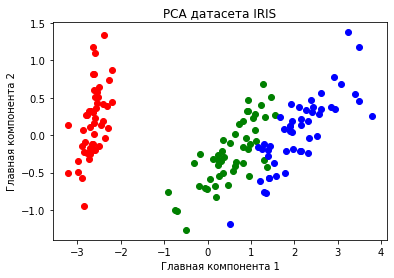

In [138]:
# Теперь можем графически посмотреть датасет после применения PCA (в 2d):
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [139]:
# Разделяем тренировочные и тестовые выборки:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
train_X_pca, test_X_pca, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [141]:
# Обучаем модели случайного леса и работаем ими по тестовым выборкам:
model = RandomForestClassifier(n_estimators=3)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)

In [142]:
model.fit(train_X_pca, train_y)
y_pred_pca = model.predict(test_X_pca)

In [143]:
# Вычисляем f1-score для исходного датасета и для датасета с применением PCA:
f1 = f1_score(test_y, y_pred, average='weighted')
f1_pca = f1_score(test_y, y_pred_pca, average='weighted')

In [144]:
print(f'f1-score для исходного датасета: {f1}, f1-score для датасета с примененным PCA: {f1_pca}')

f1-score для исходного датасета: 1.0, f1-score для датасета с примененным PCA: 1.0


*Вывод: При применении для датасета iris модели случайного леса с кол-вом деревьев 3, предварительное применение PCA на отложенной выборке несколько повышает качество классификации. При бОльшем кол-ве деревьев это преимущество нивелируется.* 

#### Задача 2
Напишите свою реализацию метода главных компонент посредством сингулярного разложения с использованием функции numpy.linalg.svd()

In [145]:
def pca(X, n_components):
    X = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X.T)
    U, S, V = np.linalg.svd(cov_matrix)
    ind = np.argsort(-S)
    U = U[:, ind]
    S = S[ind]
    U_imp = U[:, :n_components]
    return X @ U_imp

In [146]:
X_pca_2 = pca(X, 2)

In [ ]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X_pca_2[y==i, 0], X_pca_2[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()